**<h1>Introduction</h1>**
<hr>

**About Dataset**
---

This is **Fast Food Classification** data set containing images of **5 different** types of **fast food**. Each directory represents a **class**, and **each class** represents a **food type**. The Classes are $:$
* **Burger**
* **Donut**
* **Hot Dog**
* **Pizza**
* **Sandwich**

The data set is **divided into 3 parts**, the **Tensorflow records**, **Training data set** and **Validation data set**. 
* The tensorflow records directory is further **divided into 2 parts**, the **training images** and the **validation images**.These images are **resized to 256 by 256 pixels**. No other augmentation is applied. While loading the tensorflow records files, **you can apply any augmentation you want**.
 * **Training Images** : Contains **7,500** training images, with each class having **1,500 images**.
 * **Validation Images** : Contains **2,500** validation images, with each class having **500 images**.


* Unlike the **Tensorflow records data**, the **Training data and validation data** contains **direct images**. These are raw images. So **any kind of augmentation**, and specially **resizing**, can be applied on them. 
 * **Training Data** : This directory contains **5 subdirectories**. Each **directory representing a class**. Each **class have 1,500 training images**.
 * **Validation Data** : This directory also contains **5 subdirectories**. Each **directory representing a class**. Each **class have 500 images for monitoring model's performance**.


**About Notebook**
---

This notebook is **further divided into multiple sections** : 
1. **Imports**
 * Contains all the **modules** used in the **notebook**.

2. **Data Distribution**
 * Understanding the **data/class distribution.**

3. **Loading Data**
 * Loading the **fast food classification data** using **keras ImageDataGenerator**.

4. **Data Visulaization**
 * **Visualizing** the loaded data set to **better understand the problem and data set**.

5. **TF Records**
 * Loading the **tensor flow records files and visualizing the data set.**

6. **Model Architecture**
 * Creating a **model architecture** that can perfectly fit this **data set**.

7. **Predictions**
 * After **creating and tuning the model**, it's time to look at the **model's predictions**.

# **Imports**

Below are all the **imports** that are required in the **notebook**.

In [1]:
# Common
import os
import numpy as np
import tensorflow as tf

# TFRecords Loading
from tensorflow import io
from tensorflow import data as tfd
from tensorflow import train as tft
from tensorflow import image as tfi

# Data Loading 
from keras.preprocessing.image import ImageDataGenerator  as IDG

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Models 
from keras.layers import Dense, GlobalAveragePooling2D as GAP, Dropout
from keras.models import load_model, Sequential

# Pre Trained Models
from tensorflow.keras.applications import ResNet50V2, InceptionV3, Xception, ResNet50, ResNet152V2

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

!pip install tensorflow-gpu==2.9
import requests
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree

import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
from PIL import Image
import scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully unin

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Enable the auto mixed precision for better training speed.

In [3]:
os.environ['ENABLE_AUTO_MIXED_PRECISION']  = '1'

# **Data Distribution**

Before loading the data, it is **important to understand the data distribution and the class distribution**. Because our **final model** can be **affected** by the **class distribution**.

In [32]:
# Specify the root path.
train_path = '/content/drive/MyDrive/Zoodo/Fast Food Classification V2 det/Train'
valid_path = '/content/drive/MyDrive/Zoodo/Fast Food Classification V2/Valid'

In [6]:
import pathlib
train_dir = pathlib.Path("/content/drive/MyDrive/Zoodo/Fast Food Classification V2/TFRecords/Train")
valid_dir = pathlib.Path("/content/drive/MyDrive/Zoodo/Fast Food Classification V2/TFRecords/Valid")
test_dir = pathlib.Path("/content/drive/MyDrive/Zoodo/Fast Food Classification V2/TFRecords/Test")

In [33]:
# Collecte the class names.
class_names = sorted(os.listdir(train_path))
n_classes = len(class_names)

# Print
print("No. Classes : {}".format(n_classes))
print("Classes     : {}".format(class_names))

No. Classes : 10
Classes     : ['Baked Potato', 'Burger', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Pizza', 'Sandwich', 'Taco', 'Taquito']


In [ ]:
# Initialize image data generator
train_gen = IDG(rescale=1./255, rotation_range=10, horizontal_flip=True, vertical_flip=False)
valid_gen = IDG(rescale=1./255)

# Load the datasets
train_ds = train_gen.flow_from_directory(train_path, shuffle=True, batch_size=64, target_size=(256,256), class_mode='binary')
valid_ds = valid_gen.flow_from_directory(valid_path, shuffle=True, batch_size=32, target_size=(256,256), class_mode='binary')

Found 14507 images belonging to 11 classes.
Found 3500 images belonging to 10 classes.


We were already aware that our **data set consist of five classes**. Let's have a look at the **Class Distribution**.

All the classes are **equally distributed** throughout the **training data**. This is a **good sign**, because **this ensures that our model cannot be biased towards a particular class**.

---
Let's also look at the **validation class distribution**, Because this distribution can **affect how we perceive the model's performance**.

**Great!** Even in the **validation data**, all classes are **equally distributed**. So the **model predictions cannot be just random guesses**.

# **Data Loading**

We are aware about the class distribution. It's time to **load the data**.

Setting a higher batch size does not affect the model's performance, but it do affects the GPU usage. **For better utilization of the GPU, a higher batch size is set for the training data**.

# **Data Visulization**

**Before framing the final model**, we need to have a **look at the data set** so that we can decide the **model configurations**.

In [ ]:
def show_images(data, class_names=class_names, GRID=[3,6], figsize=(25,15), model=None):
    
    # Plot configurations
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    plt.figure(figsize=figsize)
    
    n=1
    for images, labels in iter(data):
        
        # Select a random image and label.
        idx = np.random.randint(len(images))
        image, label = images[idx], class_names[int(labels[idx])]
        
        # Plot image
        plt.subplot(n_rows, n_cols, n)
        title = f"True : {label}"
        if model is not None:
            pred = class_names[np.argmax(model.predict(image[np.newaxis,...])[0])]
            title = f"True : {label}\nPred : {pred}"
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
        
        n+=1
        if n>=(n_images+1):
            break
            
    plt.show()

# **TFRecords Loading**

In [ ]:
def process_data(image):
    image = tfi.decode_jpeg(image, channels=3)
    image = tfi.random_brightness(image, max_delta=0.2)
    image = tf.cast(image, tf.float32)/255.
    return image

def cvt_to_image_label(example):
    ground_truth = {
        'label':io.FixedLenFeature([], tf.int64),
        'image':io.FixedLenFeature([], tf.string)
    }

    example = io.parse_single_example(example, ground_truth)
    images, labels = example['image'], example['label']
    images = process_data(images)
    return images, labels

In [ ]:
# Specify the Path
file_pattern = '/content/drive/MyDrive/Zoodo/Fast Food Classification V2/TFRecords/Train/*.tfrecord'
files = tfd.Dataset.list_files(file_pattern)

# Load The Data
data = tfd.TFRecordDataset(files)
data = data.map(cvt_to_image_label, num_parallel_calls=tfd.AUTOTUNE)
data = data.cache().repeat(1).shuffle(2048)
train_tf_ds = data.batch(64, drop_remainder=True).prefetch(tfd.AUTOTUNE)

In [ ]:
# Specify the Path
file_pattern = '/content/drive/MyDrive/Zoodo/Fast Food Classification V2/TFRecords/Valid/*.tfrecord'
files = tfd.Dataset.list_files(file_pattern)

# Load The Data
data = tfd.TFRecordDataset(files)
data = data.map(cvt_to_image_label, num_parallel_calls=tfd.AUTOTUNE)
data = data.cache().repeat(1).shuffle(2048)
valid_tf_ds = data.batch(64, drop_remainder=True).prefetch(tfd.AUTOTUNE)

The below functions will **decode the data** and apply little bit of **data augmentation**.

Similarly, let's load the **validation data**.

**Processing and loading data** using **Tensorflow records** allow **better utilization of memory**, as well as the **tensorflow environment**.

# **Data Visualization**

In [ ]:
show_images(data=train_ds)

In [ ]:
show_images(data=train_ds)

In [ ]:
# Base Model
base = ResNet50V2(include_top=False, input_shape=(256,256,3))
base.trainable = False

# Model Architecture
model = Sequential([
    base, GAP(),
    Dense(1024, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.4),
    Dense(n_classes, activation='softmax')
])
# Callbacks
cbs = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('food-classifier.h5', save_best_only=True)
]

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
    metrics=['accuracy']
)

# Train
# model.fit(train_tf_ds, validation_data-valid_tf_ds, epochs=100, callbacks=cbs)

94668760/94668760 [==============================] - 0s 0us/step


Just like we plotted the images for **Image Data Generator data**, let's plot the images for the **Tensorflow Records**.

The **only difference** between this data and the original data is that the **tensorflow records** data is already **resized to 256 by 256 pixels**.

# **Model**

Let's focus on building the **perfect model architecture** for this **data set**.

# **Load Model**

I have already trained in the model, and the **model weights** are **available in the associated data set**. So let's **load those weights**.

In [31]:
model = load_model('/content/drive/MyDrive/Zoodo/new_model_to_predit_food.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [35]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/Zoodo/new_model_to_predit_food.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("new_Model.tflite", "wb").write(tflite_model)


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7fe8a65bb280>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7fe8a65bb280>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


15963680

In [36]:
food_list = os.listdir(r'/content/drive/MyDrive/Zoodo/Fast Food Classification V2 det/Test')
food_list


['Pizza',
 'Crispy Chicken',
 'Hot Dog',
 'Fries',
 'Taco',
 'Baked Potato',
 'Donut',
 'Burger',
 'Taquito',
 'Sandwich']

# **Model Prediction**

The model made a few errors, like it **classified a Sandwich as Burger**. But if you look at the image, you will find that the **features of that image for being sandwich is relatively lower than the features for being burger**. What I found that whenever the **model prediction** does **not matches** with the **actual class**, the image is skewed.

---
**DeepNets**

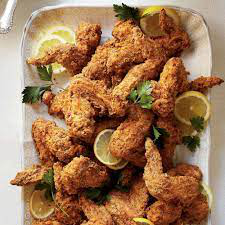

In [56]:
testing_taco = ('/content/drive/MyDrive/Zoodo/Fast Food Classification V2 det/Test/Crispy Chicken/Crispy Chicken-Test (1).jpeg')
Image.open(testing_taco)

In [57]:
# Convert image to array

path = str(testing_taco)

img = tf.keras.utils.load_img(
    path, target_size=[180, 180]
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [58]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)
score1 = 100 * np.max(score)
if score1<99.6:
  print("This is not a food")
else :
  print(
    f"This image most likely belongs to {class_names[np.argmax(score)]}"
    f"\nWith a {100 * np.max(score)} percent confidene"
)

1/1 [==============================] - 0s 36ms/step
This image most likely belongs to Crispy Chicken
With a 99.97592568397522 percent confidene


In [47]:
score1 = 100 * np.max(score)

In [48]:
if score1<99.6:
  print("This is not a food")

This is not a food


In [21]:
food=class_names[np.argmax(score)]
food

'Hot Dog'

In [22]:
import pandas as pd
path='/content/drive/MyDrive/Zoodo/Fast Food Classification V2/Health report .xlsx'
my_data = pd.read_excel(path)

In [23]:
!wget https://raw.githubusercontent.com/adeshpande3/Pandas-Tutorial/master/RegularSeasonCompactResults.csv

--2023-03-17 17:19:38--  https://raw.githubusercontent.com/adeshpande3/Pandas-Tutorial/master/RegularSeasonCompactResults.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4115852 (3.9M) [text/plain]
Saving to: ‘RegularSeasonCompactResults.csv’

RegularSeasonCompac 100%[===================>]   3.92M  --.-KB/s    in 0.08s   

2023-03-17 17:19:38 (50.1 MB/s) - ‘RegularSeasonCompactResults.csv’ saved [4115852/4115852]



In [24]:
%pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.1
astunparse==1.6.3
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
bokeh==2.4.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==3.0.4
charset-normalizer==2.0.12
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.0
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.0.5
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distributed==2022.12.1
dlib==19.24.0
dm-tree==0.1.8
docutils==0.16
dopamine-rl==1.0.5
earthengine-api==

In [ ]:
%pip freeze

In [ ]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from google.colab import files
uploaded = files.upload()

In [26]:
from google.colab import files
uploaded1 = files.upload()

In [28]:
import io
df = pd.read_excel(io.BytesIO(uploaded1['Health report .xlsx']))
df

KeyError: ignored

In [ ]:
import json
import itertools
import pandas as pd
import numpy as np

In [ ]:
Foodh = df.groupby('Food')

In [ ]:
Foodh.first()

,Dieses
Food,
Baked Potato,Hart Diseases
Burger,Hart Diseases
Crispy Chicken,Hart Diseases
Donut,Type 2 diabets
Fries,Hart Diseases
Hot Dog,obesity
Pizza,heart problems (such as cardiovascular disease)
Sandwich,certain cancers
Taco,osteoporosis


In [ ]:
Foodh.get_group(food)

,Food,Dieses
17,Fries,Hart Diseases
18,Fries,Cancer
19,Fries,Blood pressure
20,Fries,Depression
21,Fries,Osteoporosis


In [ ]:
import io
df1 = pd.read_excel(io.BytesIO(uploaded['nutrition.xlsx']))
df1

,Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.9,4.49,706.13
1,Baked Potato,250 g,674.68,20.96,39.1,19.73,0.26,40.93,59.27,3.5,1.08,1087.46
2,Crispy Chicken,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
3,Donut,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
4,Fries,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
5,Hot Dog,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
6,Pizza,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
7,Sandwich,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
8,Taco,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
9,Taquito,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g


In [ ]:
Foodh1 = df1.groupby('Items')

In [ ]:
Foodh1.first()

,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
Items,,,,,,,,,,,
Baked Potato,250 g,674.68,20.96,39.1,19.73,0.26,40.93,59.27,3.5,1.08,1087.46
Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.9,4.49,706.13
Crispy Chicken,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
Donut,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
Fries,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
Hot Dog,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
Pizza,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
Sandwich,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
Taco,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g


In [ ]:
Foodh1.get_group(food)

,Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
4,Fries,177 g,178 g,179 g,180 g,181 g,182 g,183 g,184 g,185 g,186 g,187 g
